In [74]:
import seaborn as sns
import dill
import numpy as np
import parsing
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from functools import reduce
import tfidf as t
%load_ext autoreload
%autoreload 2  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
with open('data/soup_all.pkd','rb') as file:
    soups = dill.load(file)['recipes']
with open('data/stew_all.pkd','rb') as file:
    stews = dill.load(file)['recipes']
recipes = soups + stews
ingredients = reduce(lambda x,y: x+y, map(lambda x: x['ingredients'], recipes))

In [121]:
with open('data/soup_parsed.pkd','rb') as file:
    soups = dill.load(file)['recipes']
with open('data/stew_parsed.pkd','rb') as file:
    stews = dill.load(file)['recipes']
recipes = stews + soups
ingredients_parsed = reduce(lambda x,y: x+y, map(lambda x: x['ingredients'], recipes))

In [ ]:
def convenience(recipe, recipes, restrictions, scrape=True, number=5):
    url = recipe['url']
    if scrape:
        scraper = scrape_me(url, wild_mode=True)
        
        
        title = scraper.title()
        ingredients = parsing.revise_standardize(scraper.ingredients())
        
    else:
        title = recipe['label']
        ingredients = recipe['ingredients']
    formatted_recipe = {'label':title, 'ingredients': ingredients}
    scores, matches = t.get_best(formatted_recipe, recipes, \
                        restrictions=restrictions,number_results=number)
    print(title)
    print(url)
    # print('scraped:',scraper.ingredients())
    print('scraped and processed:',ingredients)
    # print('edamam: ',recipe['ingredients'])
    print('----------------------------------------')
    for score,match in zip(scores,matches):
        if match['label'] == formatted_recipe['label']:
            print('Already satisfies')
            break
        print(score,match['label'])
        print(match['ingredients'])
        print('In common: ',set(ingredients).intersection(set(match['ingredients'])))
        print(match['url'])
        print('----------------------------------------')

In [118]:
with open('./data/pasta_parsed.pkd','rb') as file:
    recipes = dill.load(file)['recipes']

corpus = [' '.join(recipe['ingredients']) for recipe in recipes]
print(corpus[0], len(corpus))
t = TfidfVectorizer()
mt = t.fit_transform(corpus)
yt = mt.toarray()
print(yt.shape)
with open('./data/tfidf_array_pasta.pkd','wb') as file:
    print('dumping')
    dill.dump(yt, file)


nutmeg butter pinenuts raisins pasta ham spinach garlic parmesan flour milk oil 11503
(11503, 1698)
dumping


In [119]:
yt = mt.toarray()
with open('tfidf_array_pasta.pkd','wb') as file:
    dill.dump(yt, file)
# typical = yt.mean(axis=0)
# sns.histplot(typical, log_scale=True)
# n = 0

# yc = mc.toarray()
# print(yt[:,n].nonzero())
# print(yt[yt[:,n].nonzero(),n])
# x = y[:,0]
# np.std(x)

# print(type(y),y)
# y[0]
# plt.plot(y[0,:])
# sns.histplot(y[0,:],log_scale = True)

7183
2421


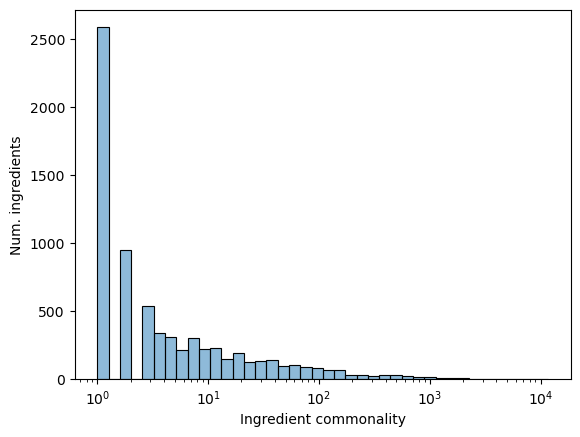

In [125]:
from collections import Counter

count = Counter(ingredients)
count_parsed = Counter(ingredients_parsed)
print(len(count))
print(len(count_parsed))
x = np.array(list(count.values()))
y = np.array(list(count_parsed.values()))
p = sns.histplot(count.values(), log_scale=True, legend=False)
p.set_xlabel('Ingredient commonality',fontsize=10)
p.set_ylabel('Num. ingredients',fontsize=10)
plt.show()
# sns.histplot(count_parsed.values(), log_scale=True)
# plt.show()

8404
Chili Bites in Mini Cornbread Cups recipes


/Users/sam/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


0.07606234187912332


<AxesSubplot: ylabel='Count'>

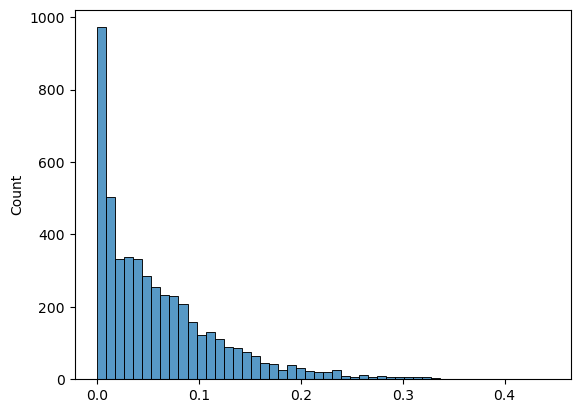

In [111]:
import random
r = recipes
i = random.randint(0,len(r))
# number = 5
# i = 1145
print(i)
recipe = r[i]
print(recipe['label'])#,recipe['url'])
restrictions = ['Vegan']
a,b,c = t.get_best(recipe, recipes, restrictions=['Vegetarian'],number_results=22000)
# print(a[:10])
print(np.dot(yt[i,:], typical))
sns.histplot(a)

In [78]:
for n, r in enumerate(recipes):
    if r['label'].lower() == 'middle eastern lamb stew':

        print(n)

1145


[0.5756180247070442, 0.5575686670164945, 0.49134978095149306, 0.4811563596287159, 0.4654653569093007, 0.45201964166415304, 0.45075959447406255, 0.4505047094045544, 0.44778100699085355, 0.44162473026751725]


<AxesSubplot: ylabel='Count'>

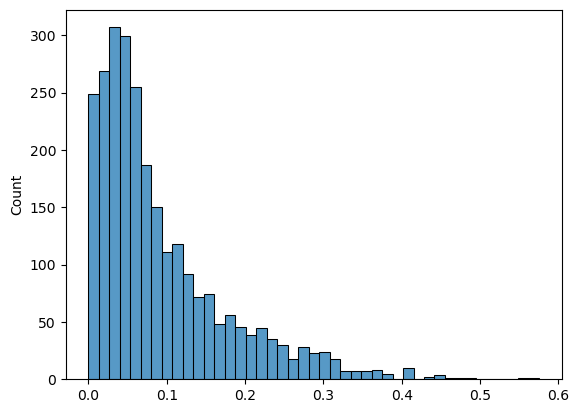